In [333]:
import os
import numpy as np
#import statistics as stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation
from sklearn import utils , feature_selection , preprocessing , metrics , decomposition
%matplotlib inline
plt.style.use('ggplot')

In [257]:
#Loading the Data
df = pd.read_csv("Hitters.csv")

In [258]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


In [259]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [260]:
#Checking for Null values for Salary
df.Salary.isnull().sum()


59

In [261]:
df = df[(df.Salary.notnull())]

In [262]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [263]:
#Data Frame now has 263 rows the null values have been dropped
len(df)

263

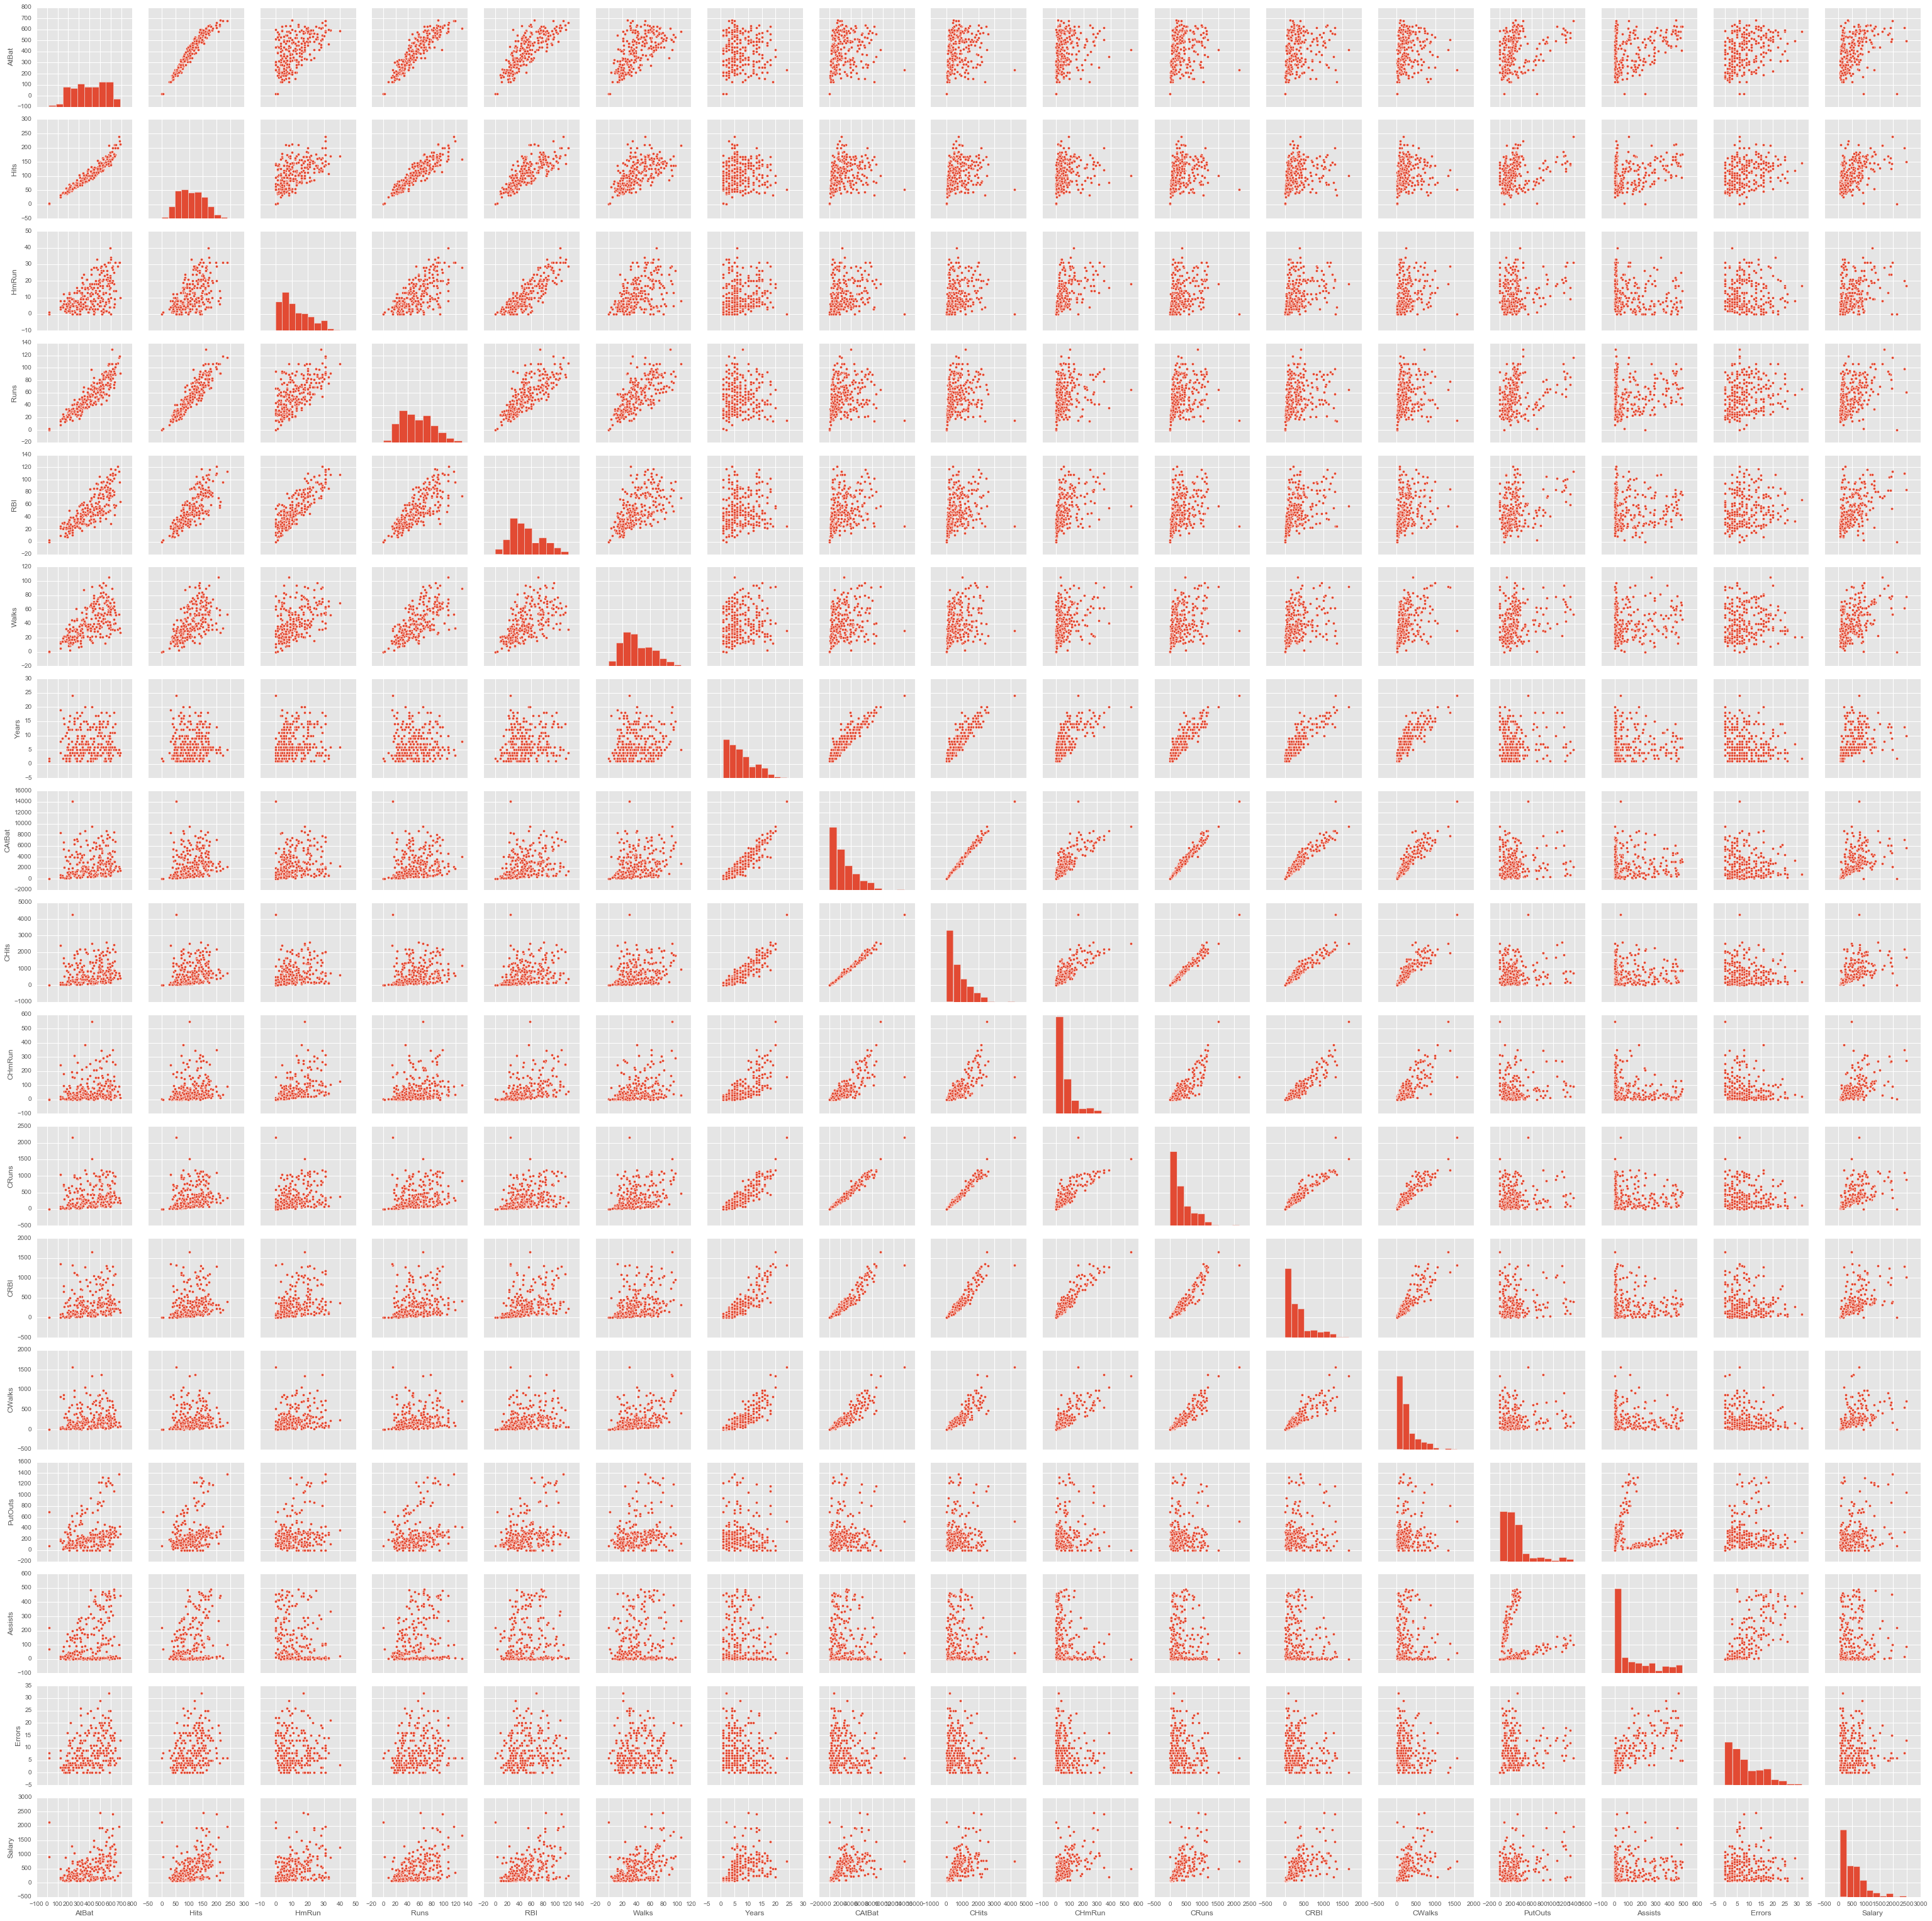

In [264]:
 plt.figure(figsize = (20,10))
sns.pairplot(data = df)

In [265]:
len(df.columns)

20

In [266]:
#Checking the Data types
df.dtypes.value_counts()

int64      16
object      3
float64     1
dtype: int64

In [267]:
#Checking for Categorical Variables
df.dtypes[df.dtypes == 'object']

League       object
Division     object
NewLeague    object
dtype: object

In [268]:
df.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [269]:
df.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [270]:
df.NewLeague.value_counts()

A    140
N    122
Name: NewLeague, dtype: int64

In [271]:
le = preprocessing.LabelEncoder()

In [272]:
df.League = le.fit(["A" ,"N"])
df.League = le.fit_transform(df.League)

In [273]:
df.Division = le.fit(["W" ,"E"])
df.Division = le.fit_transform(df.Division)

In [274]:
df.NewLeague = le.fit(["N" ,"A"])
df.NewLeague = le.fit_transform(df.NewLeague)

In [275]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,0,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,0,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,0,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,0,282,421,25,750.0,0


In [276]:
y = df.Salary
X = df.drop('Salary' , axis =1)

In [277]:
df.Division.value_counts()

0    263
Name: Division, dtype: int64

# - Exploring Feature selection

In [278]:
F,P= feature_selection.f_regression(X,y)

In [279]:
print P

[  3.06540326e-11   8.53122759e-14   1.12519532e-08   1.17992422e-12
   1.75698256e-14   4.01383312e-14   1.46261159e-11   3.97812154e-20
   4.26341680e-22   5.00954027e-20   2.31216568e-23   9.07094828e-24
   2.81709578e-17              nan              nan   6.87114221e-07
   6.81361191e-01   9.30537891e-01              nan]


In [280]:
print F

[  4.81845945e+01   6.21940090e+01   3.48071085e+01   5.58557074e+01
   6.60724539e+01   6.40384778e+01   4.99089840e+01   9.99051821e+01
   1.12551791e+02   9.92743513e+01   1.20917428e+02   1.23643776e+02
   8.23874491e+01              nan              nan   2.59041272e+01
   1.68975543e-01   7.61295957e-03              nan]


In [281]:
df_feature_imp = pd.DataFrame({'Column': np.NAN , 'p_VAL' : np.NAN},index = [0])

In [282]:
len(df.columns)

20

In [283]:
for i in range(0 ,len(df.columns)-1):
    df_feature_imp.ix[i , 'Column'] = df.columns[i]
    df_feature_imp.ix[i , 'p_VAL'] = P[i]
    

In [284]:
print df_feature_imp

      Column         p_VAL
0      AtBat  3.065403e-11
1       Hits  8.531228e-14
2      HmRun  1.125195e-08
3       Runs  1.179924e-12
4        RBI  1.756983e-14
5      Walks  4.013833e-14
6      Years  1.462612e-11
7     CAtBat  3.978122e-20
8      CHits  4.263417e-22
9     CHmRun  5.009540e-20
10     CRuns  2.312166e-23
11      CRBI  9.070948e-24
12    CWalks  2.817096e-17
13    League           NaN
14  Division           NaN
15   PutOuts  6.871142e-07
16   Assists  6.813612e-01
17    Errors  9.305379e-01
18    Salary           NaN


In [285]:
# from sklearn.feature_selection import f_regression
# temp = feature_selection.SelectKBest(f_regression , k=11)
# a.scores_
# # a= temp.fit(X,y)
# # print a.pvalues_

## Using the validation set approach to determine the number of variables and score

In [286]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.2)

In [287]:
from sklearn.feature_selection import SelectKBest , f_regression
best_feature = feature_selection.SelectKBest(f_regression ,6)
result_X = best_feature.fit_transform(train_X , train_y)
feature_index = best_feature.get_support(indices = True)

temp_linear = linear_model.LinearRegression().fit(result_X , train_y).score(result_X , train_y)
feature_list = []
for i in range(0,len(feature_index)):
    feature_list.append(train_X.columns[feature_index[i]])

a = " ".join(str(x) for x in feature_list)
print a



CAtBat CHits CHmRun CRuns CRBI CWalks


In [288]:
#creating a temp data frame to hold the values of the model evaluation
feature_eval = pd.DataFrame({'Kval':np.NAN ,'Train_score' : np.NAN , 'feature':np.NAN ,'CV_score':np.NAN  } , index = [0])

In [289]:

for k in range(0,(len(train_X.columns)-1)):
    #creating an emplty list that will hold features, this will get empty at the beginning of the loop
    feature_list = []
    
    #temp obj that will hold the best feature
    temp_obj = feature_selection.SelectKBest(f_regression , k+1)
    
    #temp_X will hold the new feature
    temp_X = temp_obj.fit_transform(train_X , train_y)
    
    #calling the get support to get the indiex of the variable/feature that was selected
    feature_index = temp_obj.get_support(indices = True)
#     print feature_index
    for i in range(0,k+1):
        feature_list.append(train_X.columns[feature_index[i]])
    
    #The code below calculates the training r_squared value 
    temp_model = linear_model.LinearRegression().fit(temp_X , train_y)
    train_score = linear_model.LinearRegression().fit(temp_X , train_y).score(temp_X , train_y)
    #mean 10 fold CV score
    cv_score = cross_validation.cross_val_score(temp_model, temp_X, train_y, cv = 10).mean()

    # populating the Data frame 
    feature_eval.ix[k ,'Kval'] = k
    feature_eval.ix[k ,'feature'] = " ".join(str(x) for x in feature_list)
    feature_eval.ix[k ,'Train_score'] = train_score
    feature_eval.ix[k ,'CV_score'] = cv_score
    
    
    
    
    
    
 

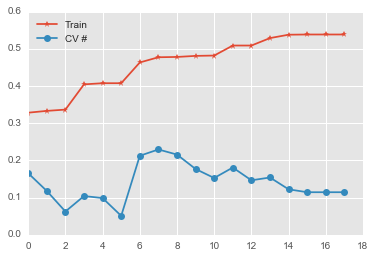

In [290]:
plt.plot( feature_eval.Kval , feature_eval.Train_score , marker = '*' , label = 'Train')
plt.plot( feature_eval.Kval ,feature_eval.CV_score , marker = 'o' ,label = 'CV #')
plt.legend(loc='upper left')

plt.show()
#legend('Train' , 'CV')

- The training set suggests that the vbest model is the one with 13 features
- The CV score says that the best model is the one that has 11 features

In [291]:
feature_eval.head()

,CV_score,Kval,Train_score,feature
0,0.165555,0.0,0.328257,CRBI
1,0.117858,1.0,0.333110,CRuns CRBI
2,0.062596,2.0,0.336547,CHits CRuns CRBI
3,0.104164,3.0,0.404418,CAtBat CHits CRuns CRBI
4,0.098755,4.0,0.407499,CAtBat CHits CHmRun CRuns CRBI


# Ridge Regression

In [292]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,0,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,0,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,0,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,0,282,421,25,750.0,0


In [293]:
# Note that the Label Encoder has assigned 0s to the categorical valies which was good to test the feature importance, but now 
# getting them back would be a good idea
df.NewLeague.value_counts()

0    263
Name: NewLeague, dtype: int64

In [294]:
df_ridge = pd.read_csv("Hitters.csv")

In [295]:
df_ridge.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Here are a few things to note aboout the Data:
- League , Division , New League are Categorical values that need to be treated differently
- A few records have NAN for Salray thta should be dropped


In [296]:
df_ridge = df_ridge[(df_ridge.Salary.notnull())]

In [297]:
df_ridge.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [298]:
#Checking if there are still NULL values for Salary
df_ridge.Salary.isnull().sum()

0

In [299]:
df_ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    262 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


- There is still one more record that has a NULL values in NewLeague.worth dropping it


In [300]:
df_ridge = df_ridge.dropna()

In [301]:
df_ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 320
Data columns (total 20 columns):
AtBat        262 non-null int64
Hits         262 non-null int64
HmRun        262 non-null int64
Runs         262 non-null int64
RBI          262 non-null int64
Walks        262 non-null int64
Years        262 non-null int64
CAtBat       262 non-null int64
CHits        262 non-null int64
CHmRun       262 non-null int64
CRuns        262 non-null int64
CRBI         262 non-null int64
CWalks       262 non-null int64
League       262 non-null object
Division     262 non-null object
PutOuts      262 non-null int64
Assists      262 non-null int64
Errors       262 non-null int64
Salary       262 non-null float64
NewLeague    262 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.0+ KB


Notice the categorical Data:
- League
- Division
- New League

In [302]:
df_ridge.League.value_counts()

A    138
N    124
Name: League, dtype: int64

In [303]:
df_ridge.Division.value_counts()

W    133
E    129
Name: Division, dtype: int64

In [304]:
df_ridge.NewLeague.value_counts()

A    140
N    122
Name: NewLeague, dtype: int64

In [305]:
enc = preprocessing.LabelEncoder()
X = df_ridge[['League']]
temp = enc.fit_transform(X)
temp.shape
temp1 = np.reshape(temp , (262 ,1))
df_ridge[['League']] = temp1

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
df_ridge.League.value_counts()

0    138
1    124
Name: League, dtype: int64

In [307]:
df_ridge.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,W,282,421,25,750.0,A


In [308]:
# Transformation on Division
enc = preprocessing.LabelEncoder()
X = df_ridge[['Division']]
temp = enc.fit_transform(X)
temp.shape
temp1 = np.reshape(temp , (262 ,1))
df_ridge[['Division']] = temp1

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [309]:
df_ridge.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,A


In [310]:
df_ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 320
Data columns (total 20 columns):
AtBat        262 non-null int64
Hits         262 non-null int64
HmRun        262 non-null int64
Runs         262 non-null int64
RBI          262 non-null int64
Walks        262 non-null int64
Years        262 non-null int64
CAtBat       262 non-null int64
CHits        262 non-null int64
CHmRun       262 non-null int64
CRuns        262 non-null int64
CRBI         262 non-null int64
CWalks       262 non-null int64
League       262 non-null int64
Division     262 non-null int64
PutOuts      262 non-null int64
Assists      262 non-null int64
Errors       262 non-null int64
Salary       262 non-null float64
NewLeague    262 non-null object
dtypes: float64(1), int64(18), object(1)
memory usage: 43.0+ KB


In [311]:

enc = preprocessing.LabelEncoder()
X = df_ridge[['NewLeague']]
temp = enc.fit_transform(X)
temp.shape
temp1 = np.reshape(temp , (262 ,1))
df_ridge[['NewLeague']] = temp1

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [312]:
df_ridge.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [313]:
df_ridge.columns

Index([u'AtBat', u'Hits', u'HmRun', u'Runs', u'RBI', u'Walks', u'Years',
       u'CAtBat', u'CHits', u'CHmRun', u'CRuns', u'CRBI', u'CWalks', u'League',
       u'Division', u'PutOuts', u'Assists', u'Errors', u'Salary',
       u'NewLeague'],
      dtype='object')

In [314]:
# Creating predictor Matrix
X_ridge = df_ridge
X_ridge = X_ridge.drop('Salary' , axis =1 )
y_ridge = df_ridge.Salary

In [315]:
train_X_ridge , test_X_ridge , train_y_ridge ,test_y_ridge = cross_validation.train_test_split(X_ridge , y_ridge , test_size = .2)

In [316]:
ridge_results = pd.DataFrame({'alpha':np.NAN , 'Train_MSE':np.NAN , 'CV_MSE':np.NAN} , index = [0])

In [317]:
len(train_X_ridge)

209

In [318]:

for i in range(0,10000):
    model_ridge = linear_model.Ridge(alpha = i )
    model_ridge.fit(train_X_ridge ,train_y_ridge)
    y_hat_ridge = model_ridge.predict(train_X_ridge)
    #print len(y_hat_ridge)
    train_error = metrics.mean_squared_error(train_y_ridge , y_hat_ridge)
    
    CV_error = cross_validation.cross_val_score(model_ridge, train_X_ridge, train_y_ridge,scoring ='mean_squared_error' , cv = 10).mean()
    
    # storing the results in the Data Frame for analysis
    ridge_results.loc[i , 'alpha'] = i
    ridge_results.ix[i ,'Train_MSE'] = train_error
    ridge_results.ix[i ,'CV_MSE' ] = CV_error
    
    
    
    
    

In [319]:
ridge_results.CV_MSE = ridge_results.CV_MSE * (-1)

In [320]:
len(ridge_results)

10000

In [322]:
#ridge_results.drop(['alpha' , 'Train_MSE' , 'CV_MSE' ] , inplace= True)

In [323]:
ridge_results

,CV_MSE,Train_MSE,alpha
0,127514.192037,92101.089914,0.0
1,127418.569012,92103.507436,1.0
2,127352.622754,92110.030311,2.0
3,127307.697868,92119.861900,3.0
4,127278.304966,92132.449521,4.0
5,127260.757763,92147.379304,5.0
6,127252.465744,92164.323634,6.0
7,127251.540318,92183.012895,7.0
8,127256.562615,92203.219191,8.0
9,127266.439871,92224.746344,9.0


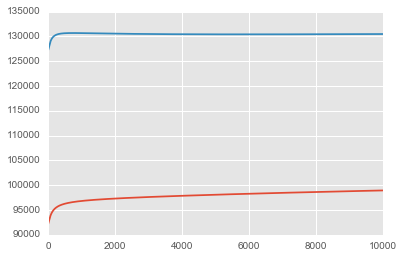

In [324]:
plt.plot(ridge_results.alpha , ridge_results.Train_MSE)
plt.plot(ridge_results.alpha , ridge_results.CV_MSE)

In [ ]:
ridge_results.CV_MSE.min()

In [325]:
#ridge_results.get_loc[104920.12718677497 , 'CV_Mat']
ridge_results.CV_MSE[(ridge_results.CV_MSE == -109599.1555996659)]


Series([], Name: CV_MSE, dtype: float64)

In [ ]:
ridge_results.ix[5215 , 'alpha']


# Lasso Regression

In [326]:
# Defining the variables
df_lasso = df_ridge
X_lasso = X_ridge
y_lasso = df_lasso.Salary


In [327]:
# Train , Test Split
train_X_l ,test_X_l , train_y_l ,test_y_l = cross_validation.train_test_split(X_lasso , y_lasso , test_size = .2 , random_state =0)

In [328]:
# Lets create a temp Dataframe that would hold the values of the coef_
lasso_results = pd.DataFrame({'alpha':np.NAN , 'Train_score':np.NAN , 'CV_score':np.NAN , 'coef':np.NAN} , index = [0])


In [329]:
alphas = 10**np.linspace(10,-2,100)*2

In [ ]:
len(alphas)

In [363]:
count = 0
lasso_results = pd.DataFrame({'alpha':np.NAN , 'Train_score':np.NAN , 'CV_score':np.NAN , 'coef':np.NAN} , index = [0])

for a in alphas*2:
#for i in range(0,len(alphas)):
    coef_list = []
    count = count + 1
    #print alphas[i]
    #print a
    model_lasso = linear_model.Lasso(alpha = a , max_iter=10000 , normalize = True,warm_start = False)
    
    model_lasso.fit(train_X_l , train_y_l)
    coef_list = (model_lasso.coef_)
    train_score = model_lasso.score(train_X_l ,train_y_l)
    CV_score = cross_validation.cross_val_score(model_lasso, train_X_l, train_y_l, cv = 10).mean()
    
    # storing the values in a DFrame
    lasso_results.loc[count-1 , 'Train_score'] = train_score
    lasso_results.loc[count-1 , 'alpha'] = a
    lasso_results.loc[count-1 , 'CV_score'] = CV_score
    lasso_results.loc[count-1 ,'coef'] = " , ".join(str(x) for x in coef_list)
    

    

In [ ]:
lasso_results

In [ ]:
lasso_results.CV_score.describe()

In [331]:
# Here is the Max CV score and the index of the alpha values
lasso_results[(lasso_results.CV_score == lasso_results.CV_score.max())]

,CV_score,Train_score,alpha,coef
85,0.234711,0.429793,1.990809,"0.0 , 1.99982382764 , 1.457822825 , 0.62886385..."


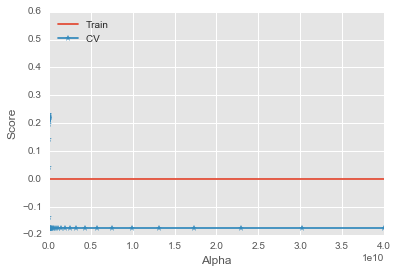

In [332]:
plt.plot( lasso_results.alpha , lasso_results.Train_score , label = 'Train' , marker = '+')
plt.xlabel('Alpha' )
plt.ylabel('Score' )
plt.plot( lasso_results.alpha ,lasso_results.CV_score ,label = 'CV ' , marker = '*')
plt.legend(loc='upper left')

plt.show()
#legend('Train' , 'CV')

In [ ]:
# Here are the coeff of the best model that is selected
lasso_results.at[85 , 'coef']

# PCA

In [334]:
pca = decomposition.PCA()

In [336]:
# Defining the Data
df_pca = df_ridge
X_pca = X_ridge
y_pca = df_pca.Salary
train_X_pca ,test_X_pca , train_y_pca ,test_y_pca = cross_validation.train_test_split(X_pca , y_pca , test_size = .2 , random_state =0)

In [365]:
from sklearn.preprocessing import scale
pca.fit(X_pca)
X_new = pca.fit_transform(scale(train_X_pca))

In [366]:
# X_new is a Matrix of 209 rows and 19 columns
X_new.shape



(209, 19)

In [368]:
pca.score(train_X_pca)

-738700239.205513

In [369]:
chk_scoring(pca ,train_X_pca , train_y_pca )

-738700239.205513

In [357]:
#cross_validation.cross_val_score(pca , train_X_pca , train_y_pca ,scoring = pca.score(train_X_pca) , cv = 10).mean()

In [371]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  36.75,   60.38,   70.68,   79.37,   84.66,   88.76,   92.24,
         94.77,   96.15,   97.19,   97.94,   98.66,   99.19,   99.49,
         99.75,   99.88,   99.96,   99.99,  100.  ])

In [379]:
# Lets create a DataFrame to capture the MSE..
df_pca_eval = pd.DataFrame({'Iter':np.NAN , 'Train_MSE':np.NAN , 'CV_MSE':np.NAN },index = [0])

In [396]:
from sklearn import decomposition
for i in range(1 ,len(train_X_pca.columns)):
    # creating a PCA model with ith  component
    pca = decomposition.PCA(i)
    pca.fit(scale(train_X_pca) , train_y_pca)
    #X_reduced holds the reduced dimension for PCA
    X_reduced = pca.fit_transform(scale(train_X_pca))
        
    df_pca_eval.loc[i-1 ,'Train_MSE' ] = -1 * pca.score(scale(train_X_pca) , train_y_pca)
    df_pca_eval.loc[i-1 ,'Iter' ] = i
    
    # evaluating CV 
    #Creating an instance of linear Regression and fitting the model with reduced X
    regr = linear_model.LinearRegression()
    regr.fit(X_reduced , scale(train_y_pca))
    
    # Calulating the MSE
    temp = -1*cross_validation.cross_val_score(regr ,X_reduced , train_y_pca ,scoring = 'mean_squared_error' , cv =10 ).mean()
    df_pca_eval.loc[i-1 ,'CV_MSE' ] = temp
    

In [397]:
df_pca_eval

,CV_MSE,Iter,Train_MSE
0,116127.044716,1.0,24.295866
1,112644.935511,2.0,21.758170
2,112931.617956,3.0,20.576515
3,110851.703759,4.0,19.203254
4,109666.529012,5.0,18.283973
5,112164.391696,6.0,17.402758
6,114104.377262,7.0,16.356928
7,115676.134424,8.0,15.345983
8,118820.755553,9.0,14.823606
9,122384.651601,10.0,14.373607


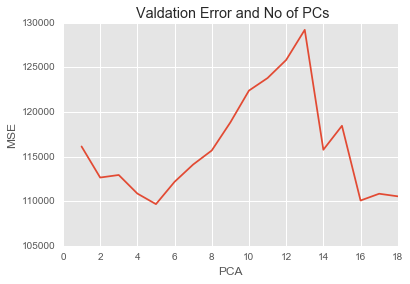

In [400]:
plt.plot(df_pca_eval.Iter , df_pca_eval.CV_MSE)

plt.xlabel('PCA')
plt.ylabel('MSE')

plt.title(" Valdation Error and No of PCs")

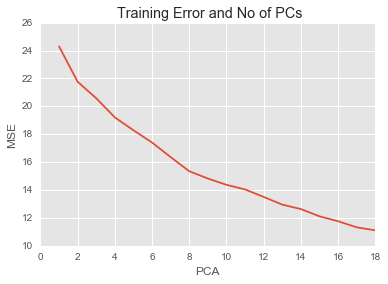

In [399]:
plt.plot(df_pca_eval.Iter , df_pca_eval.Train_MSE)
plt.xlabel('PCA')
plt.ylabel('MSE')
plt.title(" Training Error and No of PCs")

FINDING:
- Smallest CV occurs at Z = 16
- Also notice that this error is roughly the same as Z = 5 , so a smaller model could suffice

# PLS - 

In [402]:
df_pls = df_ridge
X_pls = X_ridge
y_pls = df_pca.Salary
train_X_pls ,test_X_pls , train_y_pls ,test_y_pls = cross_validation.train_test_split(X_pls , y_pls , test_size = .2 , random_state =0)

In [422]:
train_X_pls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 59 to 217
Data columns (total 19 columns):
AtBat        209 non-null int64
Hits         209 non-null int64
HmRun        209 non-null int64
Runs         209 non-null int64
RBI          209 non-null int64
Walks        209 non-null int64
Years        209 non-null int64
CAtBat       209 non-null int64
CHits        209 non-null int64
CHmRun       209 non-null int64
CRuns        209 non-null int64
CRBI         209 non-null int64
CWalks       209 non-null int64
League       209 non-null int64
Division     209 non-null int64
PutOuts      209 non-null int64
Assists      209 non-null int64
Errors       209 non-null int64
NewLeague    209 non-null int64
dtypes: int64(19)
memory usage: 32.7 KB


In [434]:
train_y_pls

59     1350.000
85      600.000
93      145.000
237     190.000
257     450.000
205      90.000
211     650.000
142    1300.000
231     750.000
17      175.000
223     240.000
127     600.000
21      115.000
162      75.000
266      97.500
291     425.000
128     662.500
236     750.000
306     500.000
189    1183.333
45      305.000
293     925.000
239     130.000
289     250.000
310    1300.000
273      90.000
132     325.000
19      135.000
137     430.000
99      490.000
         ...   
312     550.000
95      595.000
102     375.000
29      900.000
209     550.000
110    1500.000
303     425.000
219     120.000
307     277.500
53     1200.000
284     530.000
241     300.000
78      325.000
180    1310.000
118     535.000
268     140.000
92       70.000
117     700.000
49      815.000
297     245.000
25      765.000
263     740.000
10      517.143
134     175.000
243    1050.000
309     160.000
240     450.000
151      95.000
62      230.000
217    2127.333
Name: Salary, dtype: flo

In [426]:
train_X_pls.isnull().any()
train_X_pls.fillna(method='ffill')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
59,627,177,25,98,81,70,6,3210,927,133,529,472,313,0,0,240,482,13,0
85,329,83,9,50,39,56,9,3828,948,145,575,528,635,0,1,276,6,2,0
93,511,138,25,76,96,61,3,592,164,28,87,110,71,0,1,157,7,8,0
237,236,56,6,41,19,21,5,1257,329,24,166,125,105,0,0,172,1,4,0
257,348,90,11,50,45,43,10,2288,614,43,295,273,269,0,0,60,176,6,0
205,209,56,12,22,36,19,2,216,58,12,24,37,19,1,0,201,6,3,1
211,288,65,8,30,36,27,9,2815,698,55,315,325,189,1,0,259,30,10,0
142,232,55,9,34,23,45,12,4405,1213,194,702,705,625,1,0,623,35,3,1
231,526,163,12,88,50,77,4,1556,470,38,245,167,174,0,1,250,11,1,0
17,190,46,2,24,8,15,5,479,102,5,65,23,39,0,1,102,177,16,0


In [427]:
train_X_pls.isnull().any()


AtBat        False
Hits         False
HmRun        False
Runs         False
RBI          False
Walks        False
Years        False
CAtBat       False
CHits        False
CHmRun       False
CRuns        False
CRBI         False
CWalks       False
League       False
Division     False
PutOuts      False
Assists      False
Errors       False
NewLeague    False
dtype: bool

In [421]:
train_X_pls.AtBat = pd.to_numeric(train_X_pls.AtBat)

In [413]:
from sklearn.cross_decomposition import PLSRegression
pls = cross_decomposition.PLSRegression()


In [435]:
train_X_pls.shape

(209, 19)

In [416]:
# Lets create a DataFrame to capture the MSE..
df_pls_eval = pd.DataFrame({'Iter':np.NAN , 'Train_Score':np.NAN , 'CV_Score':np.NAN },index = [0])

ValueError: Found arrays with inconsistent numbers of samples: [  2 209]